## Interpolating real data

##### Go through the [Interpolation Guide](https://github.com/tww-carleton/geodac-2022/blob/main/notebooks/InterpolationGuide.ipynb) before this challenge!

In [5]:
#importing libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. 

Text(0.5, 1.0, 'Interpolated data')

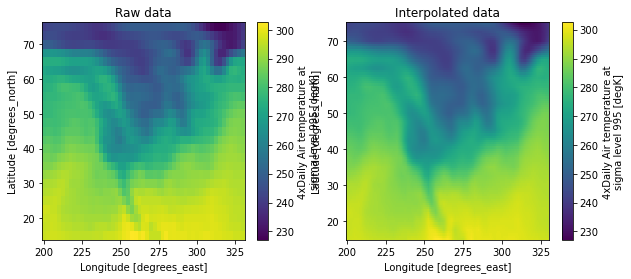

In [9]:
# Raw data
# You can use your own data files 

ds = xr.tutorial.open_dataset("air_temperature").isel(time=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

ds.air.plot(ax=axes[0])

axes[0].set_title("Raw data")

new_lon = np.linspace(ds.lon[0], ds.lon[-1], ds.dims["lon"] * 4)

new_lat = np.linspace(ds.lat[0], ds.lat[-1], ds.dims["lat"] * 4)

dsi = ds.interp(lat=new_lat, lon=new_lon)

dsi.air.plot(ax=axes[1])

axes[1].set_title("Interpolated data")

Advanced interpolation can be used to remap the data to the new coordinate. Consider the new coordinates x and z on the two dimensional plane. The remapping can be done as follows

In [17]:
# new coordinate

x = np.linspace(240, 300, 100)

z = np.linspace(20, 70, 100)


C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
C:\Users\tnevi\anaconda3\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. 

Text(0.5, 1.0, 'Remapped data')

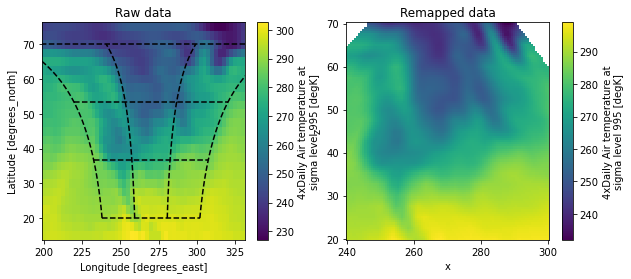

In [16]:
# relation between new and original coordinates
lat = xr.DataArray(z, dims=["z"], coords={"z": z})

lon = xr.DataArray(
    (x[:, np.newaxis] - 270) / np.cos(z * np.pi / 180) + 270,
    dims=["x", "z"],
    coords={"x": x, "z": z},
)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

ds.air.plot(ax=axes[0])

# draw the new coordinate on the original coordinates.
for idx in [0, 33, 66, 99]:
    axes[0].plot(lon.isel(x=idx), lat, "--k")


for idx in [0, 33, 66, 99]:
    axes[0].plot(*xr.broadcast(lon.isel(z=idx), lat.isel(z=idx)), "--k")


axes[0].set_title("Raw data")

dsi = ds.interp(lon=lon, lat=lat)

dsi.air.plot(ax=axes[1])

axes[1].set_title("Remapped data")

### Here we have xarray dataset, let's save it as a NetCDF   

#### Saving Datasets and DataArrays to NetCDF

Saving your Datasets and DataArrays objects to NetCDF files couldn’t be simpler. The xarray module that we’ve been using to load NetCDF files provides methods for saving your Datasets and DataArrays as NetCDF files.

Here is the manual page on the subjet: http://xarray.pydata.org/en/stable/generated/xarray.Dataset.to_netcdf.html

The method ._to_netcdf( ) is available to both Datasets and DataArrays objects. 

#### Syntax

*your_dataset.to_netcdf('/your_filepath/your_netcdf_filename.nc')*

In [ ]:
ds.to_netcdf('C:/Users/tnevi/Desktop/GEOD@C/netcdffile.nc','w')

## Try it yourself!

#### 1. Open your data file

#### 2. If needed convert your dataset into a numpy array

#### 3. Create a simple plot

#### 4. Perform data interpolation

#### 5. Plot interpolated data 

#### 6. Remap data to new coordinates

#### 7. Draw the new coordinate on the original coordinates.

#### 8. Plot remapped data

#### 9. Save modified dataset as netCDF file